# `Implementation of Logistic Regression in Python`

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [4]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


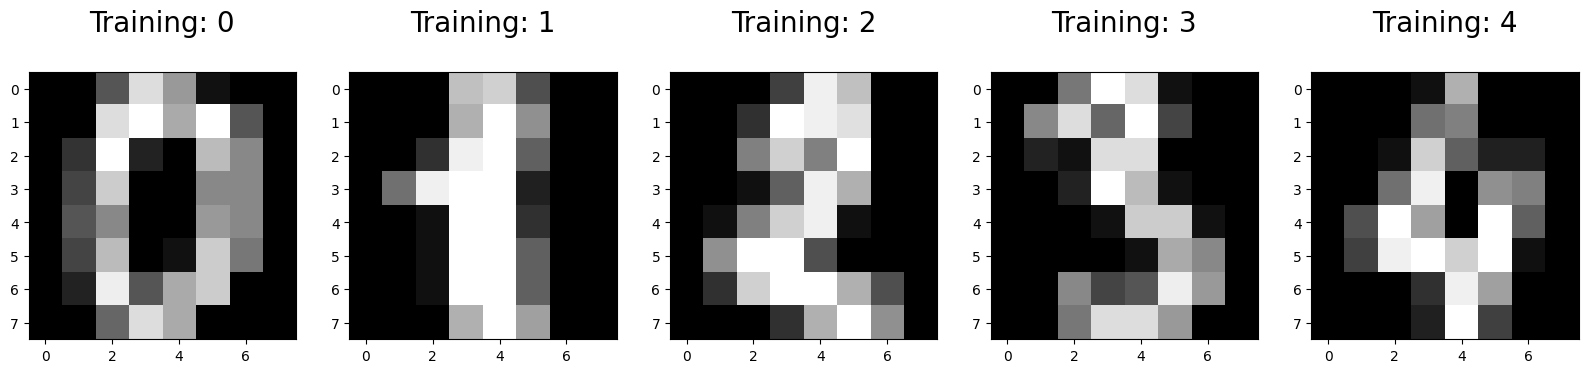

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize= (20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)



In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [7]:
print(X_train.shape)
print(y_train.shape)

(1383, 64)
(1383,)


In [10]:
print(X_test.shape)
print(y_test.shape)

(414, 64)
(414,)


In [11]:
from sklearn.linear_model import LogisticRegression

In [16]:
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [17]:
# Returns a NumPy Array
# Predict for One Observation (image)
print(logisticRegr.predict(X_test[0].reshape (1, -1)))

[4]


In [19]:
logisticRegr.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [20]:
predictions = logisticRegr.predict(X_test)

In [21]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9492753623188406


In [22]:
cm = metrics.confusion_matrix (y_test, predictions)
print (cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  1  0  0  0  0  1  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  2  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 43  0  0  0  1]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  1  0  0  0 36  1]
 [ 0  0  0  1  0  1  0  0  1 31]]


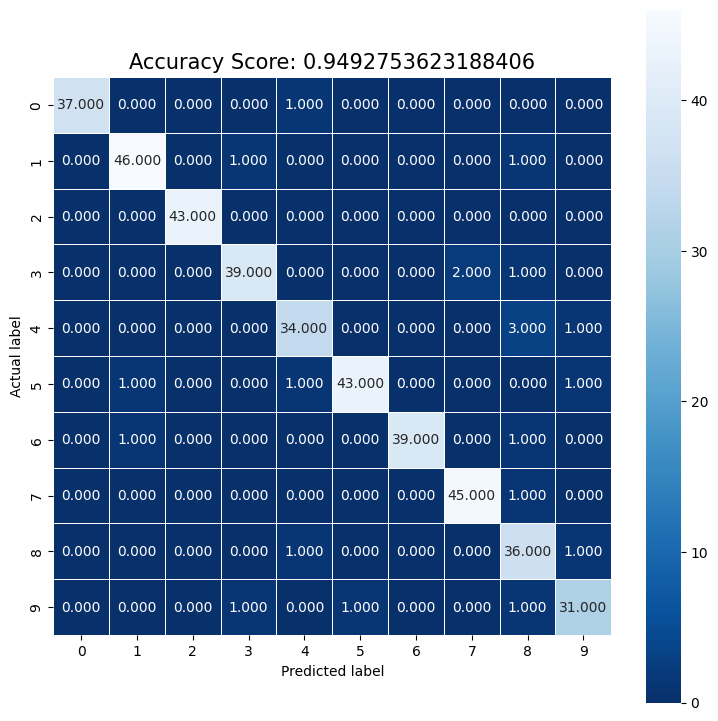

In [26]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

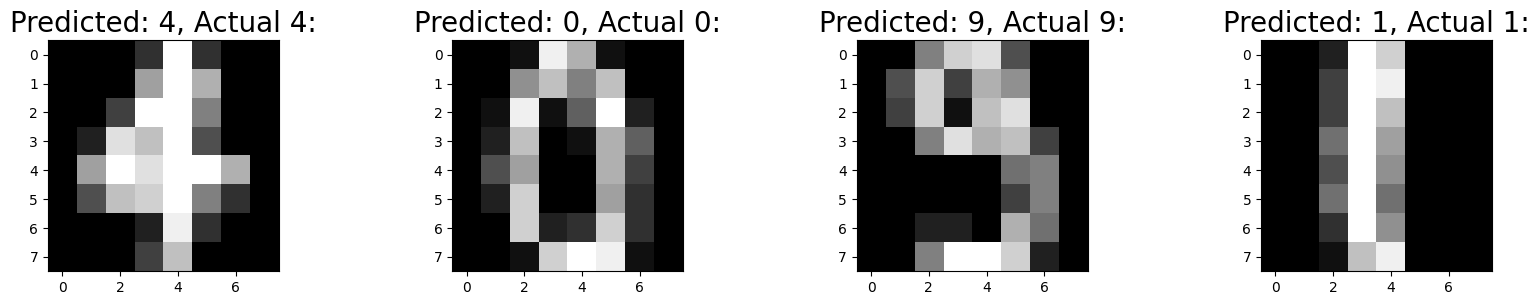

In [27]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
  if predict==actual:
    misclassifiedIndex.append(index)
  index +=1
plt.figure(figsize= (20,3))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
  plt.subplot (1,4, plotIndex +1)
  plt.imshow(np.reshape(X_test [wrong], (8,8)), cmap=plt.cm.gray)
  plt.title("Predicted: {}, Actual {}:".format (predictions [wrong], y_test[wrong]), fontsize=20)